
<a id='mc'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Finite Markov Chains

## Contents

- [Finite Markov Chains](#Finite-Markov-Chains)  
  - [Overview](#Overview)  
  - [Definitions](#Definitions)  
  - [Simulation](#Simulation)  
  - [Marginal Distributions](#Marginal-Distributions)  
  - [Irreducibility and Aperiodicity](#Irreducibility-and-Aperiodicity)  
  - [Stationary Distributions](#Stationary-Distributions)  
  - [Ergodicity](#Ergodicity)  
  - [Computing Expectations](#Computing-Expectations)  
  - [Exercises](#Exercises)  

In addition to what’s in Anaconda, this lecture will need the following libraries:

In [2]:
!pip install quantecon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 4.9 MB/s eta 0:00:00


## Overview

Markov chains are one of the most useful classes of stochastic processes, being

- simple, flexible and supported by many elegant theoretical results  
- valuable for building intuition about random dynamic models  
- central to quantitative modeling in their own right  


You will find them in many of the workhorse models of economics and finance.

In this lecture, we review some of the theory of Markov chains.

We will also introduce some of the high-quality routines for working with Markov chains available in [QuantEcon.py](https://quantecon.org/quantecon-py/).

Prerequisite knowledge is basic probability and linear algebra.

Let’s start with some standard imports:

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Definitions

The following concepts are fundamental.


<a id='finite-dp-stoch-mat'></a>

### Stochastic Matrices


<a id='index-2'></a>
A **stochastic matrix** (or **Markov matrix**)  is an $ n \times n $ square matrix $ P $
such that

1. each element of $ P $ is nonnegative, and  
1. each row of $ P $ sums to one  


Each row of $ P $ can be regarded as a probability mass function over $ n $ possible outcomes.

It is too not difficult to check <sup><a href=#pm id=pm-link>[1]</a></sup> that if $ P $ is a stochastic matrix, then so is the $ k $-th power $ P^k $ for all $ k \in \mathbb N $.

### Markov Chains


<a id='index-4'></a>
There is a close connection between stochastic matrices and Markov chains.

To begin, let $ S $ be a finite set with $ n $ elements $ \{x_1, \ldots, x_n\} $.

The set $ S $ is called the **state space** and $ x_1, \ldots, x_n $ are the **state values**.

A **Markov chain** $ \{X_t\} $ on $ S $ is a sequence of random variables on $ S $ that have the **Markov property**.

This means that, for any date $ t $ and any state $ y \in S $,


<a id='equation-fin-markov-mp'></a>
$$
\mathbb P \{ X_{t+1} = y  \,|\, X_t \}
= \mathbb P \{ X_{t+1}  = y \,|\, X_t, X_{t-1}, \ldots \} \tag{19.1}
$$

In other words, knowing the current state is enough to know probabilities for future states.

In particular, the dynamics of a Markov chain are fully determined by the set of values


<a id='equation-mpp'></a>
$$
P(x, y) := \mathbb P \{ X_{t+1} = y \,|\, X_t = x \}
\qquad (x, y \in S) \tag{19.2}
$$

By construction,

- $ P(x, y) $ is the probability of going from $ x $ to $ y $ in one unit of time (one step)  (转移概率（Transition Probability)
- $ P(x, \cdot) $ is the conditional distribution of $ X_{t+1} $ given $ X_t = x $  


We can view $ P $ as a stochastic matrix where

$$
P_{ij} = P(x_i, x_j)
\qquad 1 \leq i, j \leq n
$$

Going the other way, if we take a stochastic matrix $ P $, we can generate a Markov
chain $ \{X_t\} $ as follows:

- draw $ X_0 $ from a marginal distribution $ \psi $  
- for each $ t = 0, 1, \ldots $, draw $ X_{t+1} $ from $ P(X_t,\cdot) $  


By construction, the resulting process satisfies [(19.2)](#equation-mpp).


<a id='mc-eg1'></a>

### Example 1

Consider a worker who, at any given time $ t $, is either unemployed (state 0) or employed (state 1).

Suppose that, over a one month period,

1. An unemployed worker finds a job with probability $ \alpha \in (0, 1) $.  
1. An employed worker loses her job and becomes unemployed with probability $ \beta \in (0, 1) $.  


In terms of a Markov model, we have

- $ S = \{ 0, 1\} $  
- $ P(0, 1) = \alpha $ and $ P(1, 0) = \beta $  


We can write out the transition probabilities in matrix form as


<a id='equation-p-unempemp'></a>
$$
P
= \left(
\begin{array}{cc}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{array}
  \right) \tag{19.3}
$$

Once we have the values $ \alpha $ and $ \beta $, we can address a range of questions, such as

- What is the average duration of unemployment?  
- Over the long-run, what fraction of time does a worker find herself unemployed?  
- Conditional on employment, what is the probability of becoming unemployed at least once over the next 12 months?  


We’ll cover such applications below.


<a id='mc-eg2'></a>

### Example 2

From  US unemployment data, Hamilton [[Hamilton, 2005](https://python.quantecon.org/zreferences.html#id168)] estimated the stochastic matrix

$$
P =
\left(
  \begin{array}{ccc}
     0.971 & 0.029 & 0 \\
     0.145 & 0.778 & 0.077 \\
     0 & 0.508 & 0.492
  \end{array}
\right)
$$

where

- the frequency is monthly  
- the first state represents “normal growth”  
- the second state represents “mild recession”  
- the third state represents “severe recession”  


For example, the matrix tells us that when the state is normal growth, the state will again be normal growth next month with probability 0.97.

In general, large values on the main diagonal indicate persistence in the process $ \{ X_t \} $.

This Markov process can also be represented as a directed graph, with edges labeled by transition probabilities

![https://python.quantecon.org/_static/lecture_specific/finite_markov/hamilton_graph.png](https://python.quantecon.org/_static/lecture_specific/finite_markov/hamilton_graph.png)

  
Here “ng” is normal growth, “mr” is mild recession, etc.

## Simulation


<a id='index-5'></a>
One natural way to answer questions about Markov chains is to simulate them.

(To approximate the probability of event $ E $, we can simulate many times and count the fraction of times that $ E $ occurs).

Nice functionality for simulating Markov chains exists in [QuantEcon.py](http://quantecon.org/quantecon-py).

- Efficient, bundled with lots of other useful routines for handling Markov chains.  


However, it’s also a good exercise to roll our own routines — let’s do that first and then come back to the methods in [QuantEcon.py](http://quantecon.org/quantecon-py).

In these exercises, we’ll take the state space to be $ S = 0,\ldots, n-1 $.

### Rolling Our Own

To simulate a Markov chain, we need its stochastic matrix $ P $ and a marginal probability distribution $ \psi $  from which to  draw a realization of $ X_0 $.

The Markov chain is then constructed as discussed above.  To repeat:

1. At time $ t=0 $, draw a realization of  $ X_0 $  from $ \psi $.  
1. At each subsequent time $ t $, draw a realization of the new state $ X_{t+1} $ from $ P(X_t, \cdot) $.  


To implement this simulation procedure, we need a method for generating draws from a discrete distribution.

For this task, we’ll use `random.draw` from [QuantEcon](http://quantecon.org/quantecon-py), which works as follows:

In [4]:
ψ = (0.3, 0.7)           # probabilities over {0, 1}
cdf = np.cumsum(ψ)       # convert into cummulative distribution
qe.random.draw(cdf, 5)   # generate 5 independent draws from ψ

array([1, 1, 0, 1, 0])

We’ll write our code as a function that accepts the following three arguments

- A stochastic matrix `P`  
- An initial state `init`  
- A positive integer `sample_size` representing the length of the time series the function should return  

In [5]:
def mc_sample_path(P, ψ_0=None, sample_size=1_000):

    # set up
    P = np.asarray(P) #确保 P 被转换为 NumPy 数组，以便进行高效矩阵运算。
    X = np.empty(sample_size, dtype=int)

    # Convert each row of P into a cdf
    n = len(P) # 获取状态的数量（P 是 n×n 矩阵）。
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]
      # P[i, :] 取出 第 i 行（表示从状态 i 迁移到所有其他状态的概率）。
      # np.cumsum(P[i, :]) 计算累积概率分布（CDF），用于从离散分布中抽样。
      # 这一步将每个状态的转移概率转换为累积分布，方便后续进行随机抽样。
    # draw initial state, defaulting to 0

    if ψ_0 is not None:
        X_0 = qe.random.draw(np.cumsum(ψ_0))
          # np.cumsum(ψ_0): 计算 ψ_0 的累积概率分布（CDF）。
          # qe.random.draw(np.cumsum(ψ_0)): 从该分布中抽取初始状态。
          # e.g,: np.cumsum([0.3, 0.7]) = [0.3, 1.0]
    else:
        X_0 = 0

    # simulate
    X[0] = X_0
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])
          # qe.random.draw(P_dist[X[t]]): 根据当前状态 X[t] 的转移概率，从 P_dist[X[t]] 采样，决定下一个状态 X[t+1]。
    return X

Let’s see how it works using the small matrix

In [7]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

As we’ll see later, for a long series drawn from `P`, the fraction of the sample that takes value 0 will be about 0.25.

Moreover, this is true, regardless of the initial distribution from which
$ X_0 $ is drawn.

The following code illustrates this

In [8]:
X = mc_sample_path(P, ψ_0=[0.1, 0.9], sample_size=100_000)
np.mean(X == 0)

0.25037

You can try changing the initial distribution to confirm that the output is
always close to 0.25, at least for the `P` matrix above.

ψ_0的作用是在初始时刻随机选择状态，而不是固定从某个状态开始。
所以选什么都行

### Using QuantEcon’s Routines

As discussed above, [QuantEcon.py](http://quantecon.org/quantecon-py) has routines for handling Markov chains, including simulation.

Here’s an illustration using the same P as the preceding example

In [9]:
from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
np.mean(X == 0)

0.249194

The [QuantEcon.py](http://quantecon.org/quantecon-py) routine is [JIT compiled](https://python-programming.quantecon.org/numba.html#numba-link) and much faster.

In [9]:
%time mc_sample_path(P, sample_size=1_000_000) # Our homemade code version

CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 1.01 s


array([0, 1, 1, ..., 1, 1, 1])

In [10]:
%time mc.simulate(ts_length=1_000_000) # qe code version

CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 14.9 ms


array([0, 1, 1, ..., 0, 0, 0])

#### Adding State Values and Initial Conditions

If we wish to, we can provide a specification of state values to `MarkovChain`.

These state values can be integers, floats, or even strings.

The following code illustrates

这是用那个自带的qe搞得

In [10]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')

array(['employed', 'employed', 'employed', 'employed'], dtype='<U10')

In [11]:
mc.simulate(ts_length=4, init='unemployed')

array(['unemployed', 'employed', 'employed', 'employed'], dtype='<U10')

In [12]:
mc.simulate(ts_length=4)  # Start at randomly chosen initial state

array(['unemployed', 'unemployed', 'employed', 'employed'], dtype='<U10')

If we want to see indices rather than state values as outputs as  we can use

In [13]:
mc.simulate_indices(ts_length=4)

array([0, 0, 1, 1])


<a id='mc-md'></a>

## Marginal Distributions


<a id='index-7'></a>
Suppose that

1. $ \{X_t\} $ is a Markov chain with stochastic matrix $ P $  
1. the marginal distribution of $ X_t $ is known to be $ \psi_t $  


What then is the marginal distribution of $ X_{t+1} $, or, more generally, of $ X_{t+m} $?

To answer this, we let $ \psi_t $ be the marginal distribution of $ X_t $ for $ t = 0, 1, 2, \ldots $.

Our first aim is to find $ \psi_{t + 1} $ given $ \psi_t $ and $ P $.

To begin, pick any $ y  \in S $.

Using the [law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability), we can decompose the probability that $ X_{t+1} = y $ as follows:

$$
\mathbb P \{X_{t+1} = y \}
   = \sum_{x \in S} \mathbb P \{ X_{t+1} = y \, | \, X_t = x \}
               \cdot \mathbb P \{ X_t = x \}
$$

In words, to get the probability of being at $ y $ tomorrow, we account for
all  ways this can happen and sum their probabilities.

Rewriting this statement in terms of  marginal and conditional probabilities gives

$$
\psi_{t+1}(y) = \sum_{x \in S} P(x,y) \psi_t(x)
$$

There are $ n $ such equations, one for each $ y \in S $.

If we think of $ \psi_{t+1} $ and $ \psi_t $ as *row vectors*, these $ n $ equations are summarized by the matrix expression


<a id='equation-fin-mc-fr'></a>
$$
\psi_{t+1} = \psi_t P \tag{19.4}
$$

Thus, to move a marginal distribution forward one unit of time, we postmultiply by $ P $.

By postmultiplying $ m $ times, we move a marginal distribution forward $ m $ steps into the future.

Hence, iterating on [(19.4)](#equation-fin-mc-fr), the expression $ \psi_{t+m} = \psi_t P^m $ is also valid — here $ P^m $ is the $ m $-th power of $ P $.

As a special case, we see that if $ \psi_0 $ is the initial distribution from
which $ X_0 $ is drawn, then $ \psi_0 P^m $ is the distribution of
$ X_m $.

This is very important, so let’s repeat it


<a id='equation-mdfmc'></a>
$$
X_0 \sim \psi_0 \quad \implies \quad X_m \sim \psi_0 P^m \tag{19.5}
$$

and, more generally,


<a id='equation-mdfmc2'></a>
$$
X_t \sim \psi_t \quad \implies \quad X_{t+m} \sim \psi_t P^m \tag{19.6}
$$


<a id='finite-mc-mstp'></a>

### Multiple Step Transition Probabilities

We know that the probability of transitioning from $ x $ to $ y $ in
one step is $ P(x,y) $.

It turns out that the probability of transitioning from $ x $ to $ y $ in
$ m $ steps is $ P^m(x,y) $, the $ (x,y) $-th element of the
$ m $-th power of $ P $.

To see why, consider again [(19.6)](#equation-mdfmc2), but now with a $ \psi_t $ that puts all probability on state $ x $ so that the transition probabilities are

- 1 in the $ x $-th position and zero elsewhere  


Inserting this into [(19.6)](#equation-mdfmc2), we see that, conditional on $ X_t = x $, the distribution of $ X_{t+m} $ is the $ x $-th row of $ P^m $.

In particular

$$
\mathbb P \{X_{t+m} = y \,|\, X_t = x \} = P^m(x, y) = (x, y) \text{-th element of } P^m
$$

如果Xt =x, then最后Pm(x,y)就会对应到pm的第x行

### Example: Probability of Recession


<a id='index-8'></a>
Recall the stochastic matrix $ P $ for recession and growth [considered above](#mc-eg2).

Suppose that the current state is unknown — perhaps statistics are available only  at the *end* of the current month.

We guess that the probability that the economy is in state $ x $ is $ \psi(x) $.

The probability of being in recession (either mild or severe) in 6 months time is given by the inner product

$$
\psi P^6
\cdot
\left(
  \begin{array}{c}
     0 \\
     1 \\
     1
  \end{array}
\right)
$$


<a id='mc-eg1-1'></a>

### Example 2: Cross-Sectional Distributions


<a id='index-9'></a>
The marginal distributions we have been studying can be viewed either as
probabilities or as cross-sectional frequencies that a Law of Large Numbers leads us to anticipate for  large samples.

To illustrate, recall our model of employment/unemployment dynamics for a given worker [discussed above](#mc-eg1).

Consider a large population of workers, each of whose lifetime experience is described by the specified dynamics, with each worker’s
outcomes being realizations of processes that are statistically independent of all other workers’ processes.

Let $ \psi $ be the current *cross-sectional* distribution over $ \{ 0, 1 \} $.

The cross-sectional distribution records fractions of workers employed and unemployed at a given moment.

- For example, $ \psi(0) $ is the unemployment rate.  


What will the cross-sectional distribution be in 10 periods hence?

The answer is $ \psi P^{10} $, where $ P $ is the stochastic matrix in
[(19.3)](#equation-p-unempemp).

This is because each worker’s state evolves according to $ P $, so
$ \psi P^{10} $ is a marginal distibution  for a single randomly selected
worker.

But when the sample is large, outcomes and probabilities are roughly equal (by an application of the Law
of Large Numbers).

So for a very large (tending to infinite) population,
$ \psi P^{10} $ also represents  fractions of workers in
each state.

This is exactly the cross-sectional distribution.

马尔可夫链的边际分布不仅可以被解释为单个个体在不同时间的概率分布，还可以被解释为在某个固定时间点多个个体的状态比例。
大数定律（Law of Large Numbers） 使得在大样本下，概率分布和实际观察到的状态比例几乎相等。
- 时间角度（Time-Based View）：在这个视角下，ψt表示一个特定个体在不同时间处于某个状态的概率。
- 截面角度（Cross-Sectional View）：在这个视角下，ψt表示在时间t 时，整个群体中处于某个状态的比例。


## Irreducibility and Aperiodicity


<a id='index-11'></a>
Irreducibility and aperiodicity are central concepts of modern Markov chain theory.

Let’s see what they’re about.

### Irreducibility

Let $ P $ be a fixed stochastic matrix.

Two states $ x $ and $ y $ are said to **communicate** with each other if
there exist positive integers $ j $ and $ k $ such that

$$
P^j(x, y) > 0
\quad \text{and} \quad
P^k(y, x) > 0
$$

In view of our discussion [above](#finite-mc-mstp), this means precisely
that

- state $ x $ can eventually be reached  from state $ y $, and  
- state $ y $ can eventually  be reached from state $ x $  


The stochastic matrix $ P $ is called **irreducible** if all states
communicate; that is, if $ x $ and $ y $ communicate for all
$ (x, y) $ in $ S \times S $.

For example, consider the following transition probabilities for wealth of a fictitious set of
households

![https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_irreducibility1.png](https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_irreducibility1.png)

  
We can translate this into a stochastic matrix, putting zeros where
there’s no edge between nodes

$$
P :=
\left(
  \begin{array}{ccc}
     0.9 & 0.1 & 0 \\
     0.4 & 0.4 & 0.2 \\
     0.1 & 0.1 & 0.8
  \end{array}
\right)
$$

It’s clear from the graph that this stochastic matrix is irreducible: we can  eventually
reach any state from any other state.

We can also test this using [QuantEcon.py](http://quantecon.org/quantecon-py)’s MarkovChain class

如果所有状态都是连通的，即对任意两个状态 x,y，它们都可以在有限步内互相到达，则称马尔可夫链是不可约的（irreducible）。

In [14]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

Here’s a more pessimistic scenario in which  poor people remain poor forever

![https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_irreducibility2.png](https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_irreducibility2.png)

  
This stochastic matrix is not irreducible, since, for example, rich is not accessible from poor.

Let’s confirm this

In [15]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False

We can also determine the “communication classes”

In [16]:
mc.communication_classes

[array(['poor'], dtype='<U6'), array(['middle', 'rich'], dtype='<U6')]

It might be clear to you already that irreducibility is going to be important in terms of long run outcomes.

For example, poverty is a life sentence in the second graph but not the first.

We’ll come back to this a bit later.

### Aperiodicity

Loosely speaking, a Markov chain is called **periodic** if it cycles in a predictable way, and **aperiodic** otherwise.

Here’s a trivial example with three states

![https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_aperiodicity1.png](https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_aperiodicity1.png)

  
The chain cycles with period 3:

In [17]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

mc = qe.MarkovChain(P)
mc.period

3

周期就是从x回到x的数

More formally, the **period** of a state $ x $ is the largest common divisor
of a set of integers

$$
D(x) := \{j \geq 1 : P^j(x, x) > 0\}
$$

In the last example, $ D(x) = \{3, 6, 9, \ldots\} $ for every state $ x $, so the period is 3.

A stochastic matrix is called **aperiodic** if the period of every state is 1, and **periodic** otherwise.

For example, the stochastic matrix associated with the transition probabilities below is periodic because, for example, state $ a $ has period 2

![https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_aperiodicity2.png](https://python.quantecon.org/_static/lecture_specific/finite_markov/mc_aperiodicity2.png)

  
We can confirm that the stochastic matrix is periodic with the following code

状态a 只能在偶数步数回到自身（周期 2）。

1）a to b to a

2） a to b to c to...

总之不可能一步到a，也不可能奇数

In [18]:
P = [[0.0, 1.0, 0.0, 0.0],
     [0.5, 0.0, 0.5, 0.0],
     [0.0, 0.5, 0.0, 0.5],
     [0.0, 0.0, 1.0, 0.0]]

mc = qe.MarkovChain(P)
mc.period

2

In [19]:
mc.is_aperiodic

False

## Stationary Distributions


<a id='index-13'></a>
As seen in [(19.4)](#equation-fin-mc-fr), we can shift a marginal distribution forward one unit of time via postmultiplication by $ P $.

Some distributions are invariant under this updating process — for example,

In [20]:
P = np.array([[0.4, 0.6],
              [0.2, 0.8]])
ψ = (0.25, 0.75)
ψ @ P

array([0.25, 0.75])

Such distributions are called **stationary** or **invariant**.


<a id='mc-stat-dd'></a>
Formally, a marginal distribution $ \psi^* $ on $ S $ is called **stationary** for $ P $ if $ \psi^* = \psi^* P $.

(This is the same notion of stationarity that we learned about in the
[lecture on AR(1) processes](https://intro.quantecon.org/ar1_processes.html) applied to a different setting.)

From this equality, we immediately get $ \psi^* = \psi^* P^t $ for all $ t $.

This tells us an important fact: If the distribution of $ X_0 $ is a stationary distribution, then $ X_t $ will have this same distribution for all $ t $.

Hence stationary distributions have a natural interpretation as **stochastic steady states** — we’ll discuss this more soon.

Mathematically, a stationary distribution is a fixed point of $ P $ when $ P $ is thought of as the map $ \psi \mapsto \psi P $ from (row) vectors to (row) vectors.

**Theorem.** Every stochastic matrix $ P $ has at least one stationary distribution.

(We are assuming here that the state space $ S $ is finite; if not more assumptions are required)

For proof of this result, you can apply [Brouwer’s fixed point theorem](https://en.wikipedia.org/wiki/Brouwer_fixed-point_theorem), or see [EDTC](https://johnstachurski.net/edtc.html), theorem 4.3.5.

There can be many stationary distributions corresponding to a given stochastic matrix $ P $.

- For example, if $ P $ is the identity matrix, then all marginal distributions are stationary.  


To get uniqueness an invariant distribution, the transition matrix $ P $ must have the property that no nontrivial subsets of
the state space are **infinitely persistent**.

A subset of the state space is infinitely persistent if other parts of the
state space cannot be accessed from it.

Thus, infinite persistence of a non-trivial subset is the opposite of irreducibility.

This gives some intuition for the following fundamental theorem.


<a id='mc-conv-thm'></a>
**Theorem.** If $ P $ is both aperiodic and irreducible, then

1. $ P $ has exactly one stationary distribution $ \psi^* $.  
1. For any initial marginal distribution $ \psi_0 $, we have $ \| \psi_0 P^t - \psi^* \| \to 0 $ as $ t \to \infty $.  


For a proof, see, for example, theorem 5.2 of [[Häggström, 2002](https://python.quantecon.org/zreferences.html#id136)].

(Note that part 1 of the theorem only requires  irreducibility, whereas part 2
requires both irreducibility and aperiodicity)

A stochastic matrix that satisfies the conditions of the theorem is sometimes called **uniformly ergodic**.

A sufficient condition for aperiodicity and irreducibility is that every element of $ P $ is strictly positive.

- Try to convince yourself of this.  

如果一个马尔可夫链是 不可约（irreducible） 且 非周期（aperiodic），那么无论初始状态如何，随着 t→∞，马尔可夫链的状态分布都会收敛到唯一的平稳分布 ψ ∗
 。

**1. 平稳分布的唯一性**

一般来说，一个马尔可夫链可能有多个平稳分布。例如：

- 如果转移矩阵P 是单位矩阵（即 P=I），那么任意初始分布都是平稳分布，因为状态不会变化。
- 如果 P 由多个不连通的状态组成（即可约的情况），那么每个连通子集都有自己的平稳分布，导致多个可能的平稳分布。

**2. 无限持久性（Infinite Persistence）**

文中提到无限持久性（infinitely persistent）：

- 如果某个状态子集不能被访问（即有些状态永远不会被访问到），那么这个子集就是无限持久的。
- 但是，不可约性（irreducibility）意味着不存在这样的孤立子集，所有状态最终都可以被访问。

直观理解：
- 不可约性确保系统不会卡在某些状态子集里，而是可以到达所有状态，从而保证平稳分布的唯一性。

**3. 充分条件：一致遍历性（Uniform Ergodicity）**

如果转移矩阵 P 满足：
所有元素 Pij>0（即从任何状态到任何状态都有非零概率），那么它一定是不可约且非周期的。

这种特殊情况称为一致遍历性（Uniform Ergodicity），即：
无论初始状态如何，系统的分布都会以指数速率收敛到唯一的平稳分布。（意思是收敛速度更快）
- 遍历性（Ergodicity）只是告诉你“足够长时间后，你会忘记起点”。
- 一致遍历性（Uniform Ergodicity）告诉你“在可预见的短时间内，你会快速忘记起点”。

### Example

Recall our model of the employment/unemployment dynamics of a particular worker [discussed above](#mc-eg1).

Assuming $ \alpha \in (0,1) $ and $ \beta \in (0,1) $, the uniform ergodicity condition is satisfied.

Let $ \psi^* = (p, 1-p) $ be the stationary distribution, so that $ p $ corresponds to unemployment (state 0).

Using $ \psi^* = \psi^* P $ and a bit of algebra yields

$$
p = \frac{\beta}{\alpha + \beta}
$$

This is, in some sense, a steady state probability of unemployment — more about the  interpretation of this below.

Not surprisingly it tends to zero as $ \beta \to 0 $, and to one as $ \alpha \to 0 $.

#### **解释：失业/就业动态模型的平稳分布计算**
本例使用马尔可夫链建模 **某个工人的失业/就业状态**，并计算**平稳失业概率**。

---

## **1. 模型设定**
假设工人可以处于两种状态：
- **状态 0（Unemployment, 失业）**
- **状态 1（Employment, 就业）**

假设工人在每个时间段都有一定概率转换状态：
1. An unemployed worker finds a job with probability $ \alpha \in (0, 1) $.  
1. An employed worker loses her job and becomes unemployed with probability $ \beta \in (0, 1) $.  

因此，我们可以定义 **状态转移矩阵**：
<a id='equation-p-unempemp'></a>
$$
P
= \left(
\begin{array}{cc}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{array}
  \right) \tag{19.3}
$$


---
## **2. 平稳分布计算**
$$
P
= \begin{bmatrix}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{bmatrix}
$$

平稳分布 \( \psi^* = (p, 1 - p) \) 满足：
$$
\psi^* P = \psi^*
$$
即：
$$
(p, 1 - p) \times
\begin{bmatrix}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{bmatrix}
=
(p, 1 - p)
$$

展开矩阵运算：
$$
p(1 - \alpha) + (1 - p) \beta = p
$$

$$
p \alpha + (1 - p)(1 - \beta) = 1 - p
$$

由于两行方程是等价的（因为概率总和为 1），我们只需要解第一行方程：
$$
p(1 - \alpha) + \beta - p\beta = p
$$

整理：
$$
p(1 - \alpha - \beta) = -\beta
$$

$$
p = \frac{\beta}{\alpha + \beta}
$$

失业的平稳概率（长期失业率）：
$$
p = \frac{\beta}{\alpha + \beta}
$$

就业的平稳概率（长期就业率）：
$$
1 - p = \frac{\alpha}{\alpha + \beta}
$$

如果 \( \beta \to 0 \)（就业的人不会失业），那么 \( p \to 0 \)（长期来看，几乎所有人都会就业）。

如果 \( \alpha \to 0 \)（失业的人完全找不到工作），那么 \( p \to 1 \)（长期来看，几乎所有人都会就失业。



### Calculating Stationary Distributions


<a id='index-14'></a>
As discussed above, a particular Markov matrix $ P $ can have many stationary distributions.

That is, there can be many row vectors $ \psi $ such that $ \psi = \psi P $.

In fact if $ P $ has two distinct stationary distributions $ \psi_1,
\psi_2 $ then it has infinitely many, since in this case, as you can verify,  for any $ \lambda \in [0, 1] $

$$
\psi_3 := \lambda \psi_1 + (1 - \lambda) \psi_2
$$

is a stationary distribution for $ P $.

If we restrict attention to the case in which only one stationary distribution exists, one way to  finding it is to solve the system


<a id='equation-eq-eqpsifixed'></a>
$$
\psi (I_n - P) = 0 \tag{19.7}
$$

for $ \psi $, where $ I_n $ is the $ n \times n $ identity.

But the zero vector solves system [(19.7)](#equation-eq-eqpsifixed),  so we must proceed cautiously.
- 但是，这个方程组的解可能包括 零向量（trivial solution），而平稳分布必须是一个概率分布（所有分量非负且和为 1）。因此，我们需要进一步限制解的范围。

We want to impose the restriction that $ \psi $ is  a probability distribution.

There are various ways to do this.

One option is to regard solving system [(19.7)](#equation-eq-eqpsifixed)  as an eigenvector problem: a vector
$ \psi $ such that $ \psi = \psi P $ is a left eigenvector associated
with the unit eigenvalue $ \lambda = 1 $.

A stable and sophisticated algorithm specialized for stochastic matrices is implemented in [QuantEcon.py](http://quantecon.org/quantecon-py).

This is the one we recommend:

In [5]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

array([[0.25, 0.75]])

#### **解释特征值+MC怎么算**
## 什么是特征值和特征向量？

特征值（Eigenvalue）和特征向量（Eigenvector）是线性代数中的重要概念，常用于描述矩阵的行为。在马尔可夫链中，它们帮助我们找到**平稳分布**。

---

## 1. 直观理解特征值和特征向量

如果你有一个矩阵 \( A \)，那么**特征向量** \( x \) 是这样的一类向量：

$$
A x = \lambda x
$$

- 这里，\( \lambda \) 是一个**特征值（Eigenvalue）**。
- 也就是说，乘以矩阵 \( A \) 之后，**特征向量 \( x \) 只是被缩放了 \( \lambda \) 倍，而方向保持不变**。

### 举个简单的例子

假设：

$$
A =
\begin{bmatrix}
2 & 0 \\
0 & 3
\end{bmatrix}
$$

如果我们选取向量：

$$
x =
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

那么：

$$
A x =
\begin{bmatrix}
2 & 0 \\
0 & 3
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
2 \\
0
\end{bmatrix}
= 2x
$$

这里，\( x \) 只是被**放大了 2 倍**，方向没有变，所以它是矩阵 \( A \) 的一个特征向量，对应的特征值是 \( \lambda = 2 \)。

类似地，另一个特征向量：

$$
y =
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$$

满足：

$$
A y =
\begin{bmatrix}
2 & 0 \\
0 & 3
\end{bmatrix}
\begin{bmatrix}
0 \\
1
\end{bmatrix}
=
\begin{bmatrix}
0 \\
3
\end{bmatrix}
= 3y
$$

这里，\( y \) 只是被放大了 3 倍，对应的特征值是 \( \lambda = 3 \)。

---

## 2. 在马尔可夫链中的应用

在马尔可夫链中，我们的转移矩阵 \( P \) 满足：

$$
\psi P = \psi
$$

换一种写法：

$$
\psi P = \psi \cdot 1
$$

这意味着：
- **\( \psi \) 是矩阵 \( P \) 的特征向量**。
- **对应的特征值是 \( \lambda = 1 \)**。

换句话说，**平稳分布是转移矩阵 \( P \) 的特征值 \( 1 \) 对应的特征向量**。

---

## 3. 为什么特征值是 1？

马尔可夫转移矩阵 \( P \) 的特点：
- **每一行的和为 1**（因为它描述的是概率）。
- 这保证了 \( P \) 至少有一个特征值 \( \lambda = 1 \)。
- 该特征值对应的特征向量就是**平稳分布**，它描述的是长期状态概率。

换句话说：
- 任何初始分布 \( \psi_0 \) 经过多步转移后都会收敛到平稳分布 \( \psi^* \)：
  
  $$
  \psi_0 P^t \to \psi^*
  $$

- 这个 \( \psi^* \) 就是满足 \( \psi^* P = \psi^* \) 的特征向量。

---

## 4. 例子

### 假设有一个简单的马尔可夫链

假设我们有如下转移矩阵：

$$
P =
\begin{bmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{bmatrix}
$$

我们要求平稳分布 \( \psi = (p_1, p_2) \)，使得：

$$
\psi P = \psi
$$

展开计算：

$$
(p_1, p_2) \times
\begin{bmatrix}
0.7 & 0.3 \\
0.4 & 0.6
\end{bmatrix}
=
(p_1, p_2)
$$

得到方程：

$$
p_1 (0.7) + p_2 (0.4) = p_1
$$

$$
p_1 (0.3) + p_2 (0.6) = p_2
$$

解出：

$$
p_1 = \frac{4}{7}, \quad p_2 = \frac{3}{7}
$$

### 归一化

由于平稳分布要求**所有分量之和为 1**：

$$
p_1 + p_2 = 1
$$

这里已经满足：

$$
\frac{4}{7} + \frac{3}{7} = 1
$$

所以最终的平稳分布是：

$$
\psi^* = \left( \frac{4}{7}, \frac{3}{7} \right)
$$

---

## 5. 结论

- **特征值 \( \lambda \) 是矩阵的缩放因子，特征向量是不会改变方向的向量**。
- **在马尔可夫链中，平稳分布就是转移矩阵 \( P \) 对应的特征值 \( \lambda = 1 \) 的特征向量**。
- **求解方法：**
  1. 求解方程 \( \psi P = \psi \)（或者 \( (P - I) \psi = 0 \)）。
  2. 归一化，使得 \( \sum_i \psi_i = 1 \)。

如果你有进一步的问题，欢迎继续讨论！ 😊


### Convergence to Stationarity


<a id='index-15'></a>
Part 2 of the Markov chain convergence theorem [stated above](#mc-conv-thm) tells us that the marginal distribution of $ X_t $ converges to the stationary distribution regardless of where we begin.

This adds considerable authority to our interpretation of $ \psi^* $ as a stochastic steady state.

The convergence in the theorem is illustrated in the next figure

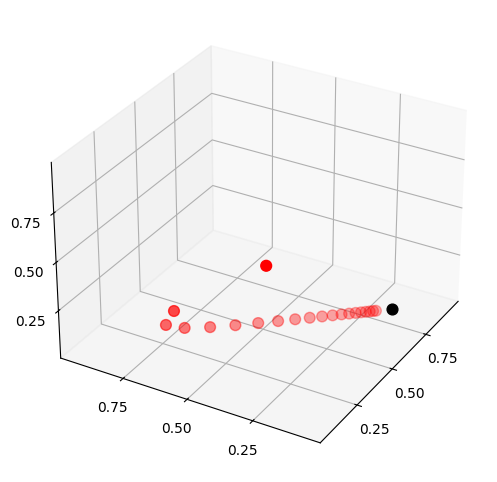

In [6]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))
P = np.array(P)

ψ = (0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') #创建一个 3D 坐标轴。

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

# 这里的 ψ = ψ @ P 表示每次左乘转移矩阵 P，即：计算 下一步的概率分布。更新 ψ 的值。

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()

Here

- $ P $ is the stochastic matrix for recession and growth [considered above](#mc-eg2).  
- The highest red dot is an arbitrarily chosen initial marginal probability distribution  $ \psi $, represented as a vector in $ \mathbb R^3 $.  
- The other red dots are the marginal distributions $ \psi P^t $ for $ t = 1, 2, \ldots $.  
- The black dot is $ \psi^* $.  


You might like to try experimenting with different initial conditions.


<a id='ergodicity'></a>

## Ergodicity


<a id='index-17'></a>
Under irreducibility, yet another important result obtains: for all $ x \in S $,


<a id='equation-llnfmc0'></a>
$$
\frac{1}{m} \sum_{t = 1}^m \mathbf{1}\{X_t = x\}  \to \psi^*(x)
    \quad \text{as } m \to \infty \tag{19.8}
$$

Here

- $ \mathbf{1}\{X_t = x\} = 1 $ if $ X_t = x $ and zero otherwise  
- convergence is with probability one  
- the result does not depend on the marginal distribution  of $ X_0 $  


The result tells us that the fraction of time the chain spends at state $ x $ converges to $ \psi^*(x) $ as time goes to infinity.


<a id='new-interp-sd'></a>
This gives us another way to interpret the stationary distribution — provided that the convergence result in [(19.8)](#equation-llnfmc0) is valid.

The convergence asserted in [(19.8)](#equation-llnfmc0) is a special case of a law of large numbers result for Markov chains — see [EDTC](http://johnstachurski.net/edtc.html), section 4.3.4 for some additional information.


<a id='mc-eg1-2'></a>

意思就是长期来看，状态的时间比例就是平稳分布的概率

### Example

Recall our cross-sectional interpretation of the employment/unemployment model [discussed above](#mc-eg1-1).

Assume that $ \alpha \in (0,1) $ and $ \beta \in (0,1) $, so that irreducibility and aperiodicity both hold.

We saw that the stationary distribution is $ (p, 1-p) $, where

$$
p = \frac{\beta}{\alpha + \beta}
$$

In the cross-sectional interpretation, this is the fraction of people unemployed.

In view of our latest (ergodicity) result, it is also **the fraction of tim**e that a single worker can expect to spend unemployed.

Thus, in the long-run, cross-sectional averages for a population and time-series averages for a given person coincide.

This is one aspect of the concept  of ergodicity.


<a id='finite-mc-expec'></a>

## Computing Expectations


<a id='index-18'></a>
We sometimes want to  compute mathematical  expectations of functions of $ X_t $ of the form


<a id='equation-mc-une'></a>
$$
\mathbb E [ h(X_t) ] \tag{19.9}
$$

and conditional expectations such as


<a id='equation-mc-cce'></a>
$$
\mathbb E [ h(X_{t + k})  \mid X_t = x] \tag{19.10}
$$

where

- $ \{X_t\} $ is a Markov chain generated by $ n \times n $ stochastic matrix $ P $  
- $ h $ is a given function, which, in terms of matrix
  algebra, we’ll think of as the column vector  


$$
h
= \left(
\begin{array}{c}
    h(x_1) \\
    \vdots \\
    h(x_n)
\end{array}
  \right)
$$

Computing the unconditional expectation [(19.9)](#equation-mc-une) is easy.

We just sum over the marginal  distribution  of $ X_t $ to get

$$
\mathbb E [ h(X_t) ]
= \sum_{x \in S} (\psi P^t)(x) h(x)
$$

Here $ \psi $ is the distribution of $ X_0 $.

Since $ \psi $ and hence $ \psi P^t $ are row vectors, we can also
write this as

$$
\mathbb E [ h(X_t) ]
=  \psi P^t h
$$

For the conditional expectation [(19.10)](#equation-mc-cce), we need to sum over
the conditional distribution of $ X_{t + k} $ given $ X_t = x $.

We already know that this is $ P^k(x, \cdot) $, so


<a id='equation-mc-cce2'></a>
$$
\mathbb E [ h(X_{t + k})  \mid X_t = x]
= (P^k h)(x) \tag{19.11}
$$

The vector $ P^k h $ stores the conditional expectation $ \mathbb E [ h(X_{t + k})  \mid X_t = x] $ over all $ x $.

### Iterated Expectations

The **law of iterated expectations** states that

$$
\mathbb E \left[ \mathbb E [ h(X_{t + k})  \mid X_t = x] \right] = \mathbb E [  h(X_{t + k}) ]
$$

where the outer $ \mathbb E $ on the left side is an unconditional distribution taken with respect to the marginal distribution  $ \psi_t $ of $ X_t $
(again see equation [(19.6)](#equation-mdfmc2)).

To verify the law of iterated expectations, use  equation [(19.11)](#equation-mc-cce2) to substitute $ (P^k h)(x) $ for $ E [ h(X_{t + k})  \mid X_t = x] $, write

$$
\mathbb E \left[ \mathbb E [ h(X_{t + k})  \mid X_t = x] \right] = \psi_t P^k h,
$$

and note $ \psi_t P^k h = \psi_{t+k} h = \mathbb E [  h(X_{t + k}) ] $.

### Expectations of Geometric Sums

Sometimes we want to compute the mathematical expectation of a geometric sum, such as
$ \sum_t \beta^t h(X_t) $.

In view of the preceding discussion, this is

$$
\mathbb{E} [
        \sum_{j=0}^\infty \beta^j h(X_{t+j}) \mid X_t = x
    \Bigr]
= [(I - \beta P)^{-1} h](x)
$$

where

$$
(I - \beta P)^{-1}  = I + \beta P + \beta^2 P^2 + \cdots
$$

Premultiplication by $ (I - \beta P)^{-1} $ amounts to “applying the **resolvent operator**”.

如果我们有一个折现因子 𝛽，我们可以用解析算子 直接计算整个未来的期望收益。

## Exercises

## Exercise 19.1

According to the discussion [above](#mc-eg1-2), if a worker’s employment dynamics obey the stochastic matrix

$$
P
= \left(
\begin{array}{cc}
    1 - \alpha & \alpha \\
    \beta & 1 - \beta
\end{array}
  \right)
$$

with $ \alpha \in (0,1) $ and $ \beta \in (0,1) $, then, in the long-run, the fraction
of time spent unemployed will be

$$
p := \frac{\beta}{\alpha + \beta}
$$

In other words, if $ \{X_t\} $ represents the Markov chain for
employment, then $ \bar X_m \to p $ as $ m \to \infty $, where

$$
\bar X_m := \frac{1}{m} \sum_{t = 1}^m \mathbf{1}\{X_t = 0\}
$$

This exercise asks you to illustrate convergence by computing
$ \bar X_m $ for large $ m $ and checking that
it is close to $ p $.

You will see that this statement is true regardless of the choice of initial
condition or the values of $ \alpha, \beta $, provided both lie in
$ (0, 1) $.

## Solution to[ Exercise 19.1](https://python.quantecon.org/#fm_ex1)

We will address this exercise graphically.

The plots show the time series of $ \bar X_m - p $ for two initial
conditions.

As $ m $ gets large, both series converge to zero.

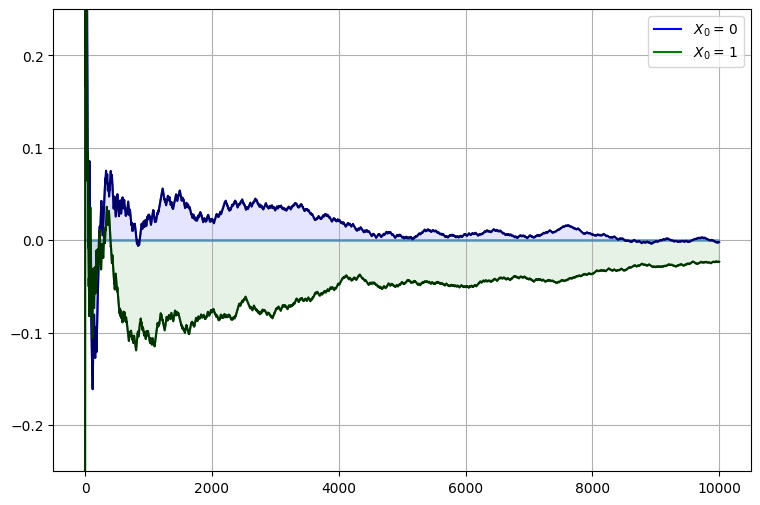

In [8]:
α = β = 0.1
N = 10000
p = β / (α + β)

P = ((1 - α,       α),               # Careful: P and p are distinct
     (    β,   1 - β))
mc = qe.MarkovChain(P)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)   # Horizonal line at zero

for x0, col in ((0, 'blue'), (1, 'green')):
    # Generate time series for worker that starts at x0
    X = mc.simulate(N, init=x0)
    # Compute fraction of time spent unemployed, for each n
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float))
    # Plot
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=col, alpha=0.1)
    ax.plot(X_bar - p, color=col, label=f'$X_0 = \, {x0} $')
    # Overlay in black--make lines clearer
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

# 纵轴是到0.5之间的偏差

## Exercise 19.2

A topic of interest for economics and many other disciplines is *ranking*.

Let’s now consider one of the most practical and important ranking problems
— the rank assigned to web pages by search engines.

(Although the problem is motivated from outside of economics, there is in fact a deep connection between search ranking systems and prices in certain competitive equilibria — see [[Du *et al.*, 2013](https://python.quantecon.org/zreferences.html#id160)].)

To understand the issue, consider the set of results returned by a query to a web search engine.

For the user, it is desirable to

1. receive a large set of accurate matches  
1. have the matches returned in order, where the order corresponds to some measure of “importance”  


Ranking according to a measure of importance is the problem we now consider.

The methodology developed to solve this problem by Google founders Larry Page and Sergey Brin
is known as [PageRank](https://en.wikipedia.org/wiki/PageRank).

To illustrate the idea, consider the following diagram

![https://python.quantecon.org/_static/lecture_specific/finite_markov/web_graph.png](https://python.quantecon.org/_static/lecture_specific/finite_markov/web_graph.png)

  
Imagine that this is a miniature version of the WWW, with

- each node representing a web page  
- each arrow representing the existence of a link from one page to another  


Now let’s think about which pages are likely to be important, in the sense of being valuable to a search engine user.

One possible criterion for the importance of a page is the number of inbound links — an indication of popularity.

By this measure, `m` and `j` are the most important pages, with 5 inbound links each.

However, what if the pages linking to `m`, say, are not themselves important?

Thinking this way, it seems appropriate to weight the inbound nodes by relative importance.

The PageRank algorithm does precisely this.

A slightly simplified presentation that captures the basic idea is as follows.

Letting $ j $ be (the integer index of) a typical page and $ r_j $ be its ranking, we set

$$
r_j = \sum_{i \in L_j} \frac{r_i}{\ell_i}
$$

where

- $ \ell_i $ is the total number of outbound links from $ i $  
- $ L_j $ is the set of all pages $ i $ such that $ i $ has a link to $ j $  


This is a measure of the number of inbound links, weighted by their own ranking (and normalized by $ 1 / \ell_i $).

There is, however, another interpretation, and it brings us back to Markov chains.

Let $ P $ be the matrix given by $ P(i, j) = \mathbf 1\{i \to j\} / \ell_i $ where $ \mathbf 1\{i \to j\} = 1 $ if $ i $ has a link to $ j $ and zero otherwise.

The matrix $ P $ is a stochastic matrix provided that each page has at least one link.

With this definition of $ P $ we have

$$
r_j
= \sum_{i \in L_j} \frac{r_i}{\ell_i}
= \sum_{\text{all } i} \mathbf 1\{i \to j\} \frac{r_i}{\ell_i}
= \sum_{\text{all } i} P(i, j) r_i
$$

Writing $ r $ for the row vector of rankings, this becomes $ r = r P $.

Hence $ r $ is the stationary distribution of the stochastic matrix $ P $.

Let’s think of $ P(i, j) $ as the probability of “moving” from page $ i $ to page $ j $.

The value $ P(i, j) $ has the interpretation

- $ P(i, j) = 1/k $ if $ i $ has $ k $ outbound links and $ j $ is one of them  
- $ P(i, j) = 0 $ if $ i $ has no direct link to $ j $  


Thus, motion from page to page is that of a web surfer who moves from one page to another by randomly clicking on one of the links on that page.

Here “random” means that each link is selected with equal probability.

Since $ r $ is the stationary distribution of $ P $, assuming that the uniform ergodicity condition is valid, we [can interpret](#new-interp-sd) $ r_j $ as the fraction of time that a (very persistent) random surfer spends at page $ j $.

Your exercise is to apply this ranking algorithm to the graph pictured above
and return the list of pages ordered by rank.

There is a total of 14 nodes (i.e., web pages), the first named `a` and the last named `n`.

A typical line from the file has the form

```text
d -> h;
```


This should be interpreted as meaning that there exists a link from `d` to `h`.

The data for this graph is shown below, and read into a file called `web_graph_data.txt` when the cell is executed.

In [9]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;

Writing web_graph_data.txt


To parse this file and extract the relevant information, you can use [regular expressions](https://docs.python.org/3/library/re.html).

The following code snippet provides a hint as to how you can go about this

In [10]:
import re
re.findall('\w', 'x +++ y ****** z')  # \w matches alphanumerics

['x', 'y', 'z']

In [11]:
re.findall('\w', 'a ^^ b &&& $$ c')

['a', 'b', 'c']

When you solve for the ranking, you will find that the highest ranked node is in fact `g`, while the lowest is `a`.

## Solution to[ Exercise 19.2](https://python.quantecon.org/#fm_ex2)

Here is one solution:

In [13]:
"""
Return list of pages, ordered by rank
"""
import re
from operator import itemgetter

infile = 'web_graph_data.txt'
alphabet = 'abcdefghijklmnopqrstuvwxyz'

n = 14 # Total number of web pages (nodes)

# Create a matrix Q indicating existence of links
#  * Q[i, j] = 1 if there is a link from i to j
#  * Q[i, j] = 0 otherwise
Q = np.zeros((n, n), dtype=int)
with open(infile) as f:
    edges = f.readlines()
for edge in edges:
    from_node, to_node = re.findall('\w', edge)
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
# Create the corresponding Markov matrix P
P = np.empty((n, n))
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()
mc = qe.MarkovChain(P)

# Compute the stationary distribution r
r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}
# Print solution, sorted from highest to lowest rank
print('Rankings\n ***')
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print(f'{name}: {rank:.4}')

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911


## Exercise 19.3

In numerical work, it is sometimes convenient to replace a continuous model with a discrete one.

In particular, Markov chains are routinely generated as discrete approximations to AR(1) processes of the form

$$
y_{t+1} = \rho y_t + u_{t+1}
$$

Here $ {u_t} $ is assumed to be IID and $ N(0, \sigma_u^2) $.

The variance of the stationary probability distribution of $ \{ y_t \} $ is

$$
\sigma_y^2 := \frac{\sigma_u^2}{1-\rho^2}
$$

Tauchen’s method [[Tauchen, 1986](https://python.quantecon.org/zreferences.html#id225)] is the most common method for approximating this continuous state process with a finite state Markov chain.

A routine for this already exists in [QuantEcon.py](http://quantecon.org/quantecon-py) but let’s write our own version as an exercise.

As a first step, we choose

- $ n $, the number of states for the discrete approximation  
- $ m $, an integer that parameterizes the width of the state space  


Next, we create a state space $ \{x_0, \ldots, x_{n-1}\} \subset \mathbb R $
and a stochastic $ n \times n $ matrix $ P $ such that

- $ x_0 = - m \, \sigma_y $  
- $ x_{n-1} = m \, \sigma_y $  
- $ x_{i+1} = x_i + s $ where $ s = (x_{n-1} - x_0) / (n - 1) $  


Let $ F $ be the cumulative distribution function of the normal distribution $ N(0, \sigma_u^2) $.

The values $ P(x_i, x_j) $ are computed to approximate the AR(1) process — omitting the derivation, the rules are as follows:

1. If $ j = 0 $, then set  
  $$
  P(x_i, x_j) = P(x_i, x_0) = F(x_0-\rho x_i + s/2)
  $$
1. If $ j = n-1 $, then set  
  $$
  P(x_i, x_j) = P(x_i, x_{n-1}) = 1 - F(x_{n-1} - \rho x_i - s/2)
  $$
1. Otherwise, set  
  $$
  P(x_i, x_j) = F(x_j - \rho x_i + s/2) - F(x_j - \rho x_i - s/2)
  $$


The exercise is to write a function `approx_markov(rho, sigma_u, m=3, n=7)` that returns
$ \{x_0, \ldots, x_{n-1}\} \subset \mathbb R $ and $ n \times n $ matrix
$ P $ as described above.

- Even better, write a function that returns an instance of [QuantEcon.py’s](http://quantecon.org/quantecon-py) MarkovChain class.  

Tauchen’s method： 用有限状态马尔可夫链近似连续状态的AR(1)过程，使得离散模型的行为尽可能接近原始连续过程。

这个不会

## **Tauchen’s Method 详解**
Tauchen（1986）的方法是**离散化连续时间AR(1)过程**的标准方法，广泛用于经济学、金融建模和动态随机一般均衡（DSGE）模型中。

其核心目标是：
> **用有限状态马尔可夫链近似连续状态的AR(1)过程，使得离散模型的行为尽可能接近原始连续过程。**

---

## **1. 为什么要用 Tauchen 方法？**
在实际应用中，很多经济变量（如 GDP、消费、资产回报率等）被建模为连续状态的AR(1)过程：
$$
y_{t+1} = \rho y_t + u_{t+1}, \quad u_t \sim N(0, \sigma_u^2)
$$
但是，计算机只能处理**有限离散状态**，因此我们需要找到一个**离散状态马尔可夫链**，使得其行为能近似原始的连续状态过程。

Tauchen 方法正是这样一种**数值近似方法**，它构造了：
- **离散状态空间** \( \{x_0, \dots, x_{n-1}\} \) 来表示 \( y_t \)
- **马尔可夫转移矩阵** \( P \)，使得离散化的马尔可夫过程尽可能保留原始过程的统计特性

---

## **2. Tauchen 方法的步骤**
Tauchen 方法的关键步骤如下：

### **(1) 计算状态空间 \( x_i \)**
首先，我们离散化连续变量 \( y_t \)，使其取离散状态 \( x_0, \dots, x_{n-1} \)。具体方法是：
$$
x_0 = -m \sigma_y, \quad x_{n-1} = m \sigma_y
$$
其中：
- $$ \sigma_y^2 = \frac{\sigma_u^2}{1 - \rho^2} $$ 是原始AR(1)过程的长期方差
- \( m \) 是一个**扩展因子**，通常取 \( m = 3 \)，确保离散状态的范围足够大
- 状态之间的间隔 \( s \) 定义为：
$$
s = \frac{x_{n-1} - x_0}{n - 1}
$$
- 中间状态点按等间距构造：
$$
x_{i+1} = x_i + s
$$

**直觉**：
- 这一步的目的是创建一个**离散的状态空间**，其范围覆盖了大部分可能的 \( y_t \) 取值。

---

### **(2) 计算转移概率矩阵 \( P(x_i, x_j) \)**
转移概率 \( P(x_i, x_j) \) 近似原始AR(1)过程的条件分布：
$$
y_{t+1} \sim N(\rho x_i, \sigma_u^2)
$$
其中：
- \( y_{t+1} \) 的均值为 \( \rho x_i \)
- \( y_{t+1} \) 的方差为 \( \sigma_u^2 \)

**转移概率的计算方式**：
1. **左端点（最小状态） \( x_0 \) 的概率：**
   $$
   P(x_i, x_0) = F(x_0 - \rho x_i + s/2)
   $$
   这里，\( F(x) \) 是标准正态累积分布函数（CDF），表示 \( y_{t+1} \) 落在区间 \( (-\infty, x_0 + s/2] \) 的概率。

2. **右端点（最大状态） \( x_{n-1} \) 的概率：**
   $$
   P(x_i, x_{n-1}) = 1 - F(x_{n-1} - \rho x_i - s/2)
   $$
   表示 \( y_{t+1} \) 落在 \( [x_{n-1} - s/2, \infty) \) 的概率。

3. **中间状态的概率：**
   $$
   P(x_i, x_j) = F(x_j - \rho x_i + s/2) - F(x_j - \rho x_i - s/2)
   $$
   表示 \( y_{t+1} \) 落在 \( [x_j - s/2, x_j + s/2] \) 的概率。

**直觉**：
- 这一步的目的是计算每个状态 \( x_i \) 迁移到其他状态 \( x_j \) 的概率，使得该马尔可夫链可以逼近连续AR(1)过程。

---

## **3. 结果的意义**
Tauchen 方法的最终输出是：
- **状态空间** \( \{x_0, x_1, \dots, x_{n-1}\} \)
- **马尔可夫转移矩阵** \( P \)

这意味着：
- 任何连续时间AR(1)过程，都可以用 Tauchen 方法离散化为**有限状态的马尔可夫过程**。
- 这为 DSGE 模型、数值求解、经济动态模拟等提供了标准工具。
- 由于 \( P \) 是一个马尔可夫转移矩阵，我们可以进一步计算：
  - **平稳分布**（长期概率分布）
  - **时间序列模拟**
  - **政策分析（如货币政策影响）**

---

## **4. 为什么这样构造 \( P \)？**
我们需要保证：
- 近似的**离散马尔可夫过程**与**连续AR(1)过程**的统计性质一致。
- 状态间的转移概率保持AR(1)的**自相关特性**。
- **总概率和为 1**（行和为 1，满足马尔可夫性质）。
- 用累积分布函数 \( F(x) \) 确保**正态分布特性**。

**总结：**
- Tauchen 方法通过将连续变量映射到离散状态，并计算马尔可夫转移概率，保证了离散模型对连续模型的逼近。
- 这种方法在经济学、金融学中被广泛用于动态建模，尤其是在**动态随机一般均衡（DSGE）模型**和**资产定价**中。
- 它为数值计算提供了一种**标准化的数值近似方法**，便于用计算机模拟经济过程。


## Solution to[ Exercise 19.3](https://python.quantecon.org/#fm_ex3)

A solution from the [QuantEcon.py](http://quantecon.org/quantecon-py) library
can be found [here](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/markov/approximation.py).

<p><a id=pm href=#pm-link><strong>[1]</strong></a> Hint: First show that if $ P $ and $ Q $ are stochastic matrices then so is their product — to check the row sums, try post multiplying by a column vector of ones.  Finally, argue that $ P^n $ is a stochastic matrix using induction.